## Exploring the Link Between Universal Health Coverage and Depression

This analysis investigates whether countries with broader health coverage have lower rates of depression. Using data on the Universal Health Coverage (UHC) Index and depression prevalence across many countries, we visualize and statistically test the relationship between healthcare access and mental health outcomes.

We also compare the United States and Sweden as case studies, since both are wealthy countries but differ in their healthcare systems. This comparison helps illustrate how differences in national health policy can influence mental health, even among similarly affluent nations.

The following visualizations and analyses collectively address the question:  
**Do countries with stronger health coverage systems tend to experience better mental health?**




## Loading and Preparing Universal Health Coverage Data

We load the Universal Health Coverage (UHC) dataset from a CSV file.  
Because the file contains metadata rows at the top, we skip those to get to the actual data.  

The dataset is in a wide format with columns for each year from 2000 to 2022. We use the `melt` function to reshape it into a long format with columns for country (`entity`), year, and UHC index (`uhc_index`).  

Finally, we clean and convert data types for analysis.

---

## Inspecting Merged Dataset

After merging the UHC data with the mental health dataset, we print the first few rows and check the shape of the combined dataframe to ensure the merge was successful and the data is ready for analysis.


In [126]:
import pandas as pd
import zipfile

with zipfile.ZipFile('Dataset/MentalHealth.zip', 'r') as zip_ref:
    zip_ref.extractall('Dataset/MentalHealth')  # Extract to this folder


uhc_csv = 'Dataset/GDP.csv'  # Define your variable here
df_uhc = pd.read_csv(uhc_csv, skiprows=4)  # Now use it

# See what columns you have
print(df_uhc.columns.tolist())



['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024', 'Unnamed: 69']


In [127]:
df_mental = pd.read_csv('Dataset/MentalHealth/1-mental-illnesses-prevalence.csv')
print(df_mental.columns.tolist())


['Entity', 'Code', 'Year', 'Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized', 'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized', 'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized', 'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized', 'Eating disorders (share of population) - Sex: Both - Age: Age-standardized']


In [128]:
df_uhc_long = df_uhc.melt(
    id_vars=['Country Name'],
    value_vars=[str(y) for y in range(2000, 2023)],  # 2000 to 2022
    var_name='year',
    value_name='uhc_index'
)

# Clean column names
df_uhc_long = df_uhc_long.rename(columns={'Country Name': 'entity'})
df_uhc_long['year'] = df_uhc_long['year'].astype(int)
df_uhc_long['uhc_index'] = pd.to_numeric(df_uhc_long['uhc_index'], errors='coerce')
print(df_uhc_long.head())


                        entity  year  uhc_index
0                        Aruba  2000        NaN
1  Africa Eastern and Southern  2000        NaN
2                  Afghanistan  2000       23.0
3   Africa Western and Central  2000        NaN
4                       Angola  2000       21.0


In [129]:
df_uhc = pd.read_csv('Dataset/GDP.csv', skiprows=4)
df_uhc_long = df_uhc.melt(
    id_vars=['Country Name'],
    value_vars=[str(y) for y in range(2000, 2023)],
    var_name='year',
    value_name='uhc_index'
)
df_uhc_long = df_uhc_long.rename(columns={'Country Name': 'entity'})
df_uhc_long['year'] = df_uhc_long['year'].astype(int)
df_uhc_long['uhc_index'] = pd.to_numeric(df_uhc_long['uhc_index'], errors='coerce')
df_uhc_long = df_uhc_long.dropna(subset=['uhc_index'])


In [130]:
print(df_uhc_long.columns)
print(df_uhc_long.head())


Index(['entity', 'year', 'uhc_index'], dtype='object')
                 entity  year  uhc_index
2           Afghanistan  2000       23.0
4                Angola  2000       21.0
5               Albania  2000       43.0
6               Andorra  2000       67.0
8  United Arab Emirates  2000       48.0


In [131]:
# Converting column names are lowercase and consistent
df_mental.columns = df_mental.columns.str.lower()

# columns like 'entity' and 'year' will be lowercase
print(df_mental.columns)

#convert 'year' to int (if not already)
df_mental['year'] = pd.to_numeric(df_mental['year'], errors='coerce').astype('Int64')

#same for df_uhc_long just in case
df_uhc_long.columns = df_uhc_long.columns.str.lower()
df_uhc_long['year'] = pd.to_numeric(df_uhc_long['year'], errors='coerce').astype('Int64')

# Now merge on lowercase 'entity' and 'year'
df_merged = pd.merge(
    df_mental,
    df_uhc_long[['entity', 'year', 'uhc_index']],
    on=['entity', 'year'],
    how='left'
)


Index(['entity', 'code', 'year',
       'schizophrenia disorders (share of population) - sex: both - age: age-standardized',
       'depressive disorders (share of population) - sex: both - age: age-standardized',
       'anxiety disorders (share of population) - sex: both - age: age-standardized',
       'bipolar disorders (share of population) - sex: both - age: age-standardized',
       'eating disorders (share of population) - sex: both - age: age-standardized'],
      dtype='object')


## Merging Mental Health and UHC Datasets

Before analyzing the relationship between mental health and Universal Health Coverage (UHC),  
we merge the two datasets on the country (`entity`) and year (`year`) columns.  

To ensure a successful merge, we convert the `year` columns to numeric types in both datasets.  
The merged dataset will include mental health indicators alongside the corresponding UHC index for each country-year.


In [132]:
# Ensure 'year' is numeric
df_mental['year'] = pd.to_numeric(df_mental['year'], errors='coerce').astype('Int64')

# Ensure the same for df_uhc_long if not done yet
df_uhc_long['year'] = pd.to_numeric(df_uhc_long['year'], errors='coerce').astype('Int64')

# Merge datasets on 'entity' and 'year'
df_merged = pd.merge(
    df_mental,
    df_uhc_long[['entity', 'year', 'uhc_index']],
    on=['entity', 'year'],
    how='left'
)

# Check the first few rows to confirm
print(df_merged.head())
print(df_merged.shape)


        entity code  year  \
0  Afghanistan  AFG  1990   
1  Afghanistan  AFG  1991   
2  Afghanistan  AFG  1992   
3  Afghanistan  AFG  1993   
4  Afghanistan  AFG  1994   

   schizophrenia disorders (share of population) - sex: both - age: age-standardized  \
0                                           0.223206                                   
1                                           0.222454                                   
2                                           0.221751                                   
3                                           0.220987                                   
4                                           0.220183                                   

   depressive disorders (share of population) - sex: both - age: age-standardized  \
0                                           4.996118                                
1                                           4.989290                                
2                                        

## Filtering for Complete UHC Data

After merging, some rows may have missing UHC index values.  
We filter the merged dataset to keep only rows where the UHC index is present (`notna()`),  
ensuring that all subsequent analyses use complete data for Universal Health Coverage.  

This filtered dataframe `df_uhc_plot` will be used for plotting and statistical analysis.


In [133]:
# After merge
print(df_merged.head())
print(df_merged.shape)

# After filtering :
df_uhc_plot = df_merged[df_merged['uhc_index'].notna()]
print(df_uhc_plot.shape)  # (Optional) See how many rows remain with UHC data


        entity code  year  \
0  Afghanistan  AFG  1990   
1  Afghanistan  AFG  1991   
2  Afghanistan  AFG  1992   
3  Afghanistan  AFG  1993   
4  Afghanistan  AFG  1994   

   schizophrenia disorders (share of population) - sex: both - age: age-standardized  \
0                                           0.223206                                   
1                                           0.222454                                   
2                                           0.221751                                   
3                                           0.220987                                   
4                                           0.220183                                   

   depressive disorders (share of population) - sex: both - age: age-standardized  \
0                                           4.996118                                
1                                           4.989290                                
2                                        

## Visualizing the Relationship Between UHC and Depression at the Country Level

To understand how health coverage relates to mental health outcomes, we aggregated the data by country, calculating the average Universal Health Coverage (UHC) index and average depression rate for each country over the entire study period.  

The scatterplot below displays this relationship, revealing broad patterns across nations. It highlights how countries with higher average health coverage tend to have lower average depression rates.  

To deepen this insight, we also include a regression plot with key countries annotated to identify notable outliers or leaders in health coverage and mental health outcomes. These visualizations provide a foundation for interpreting the overall association between healthcare accessibility and depression on a macro level.


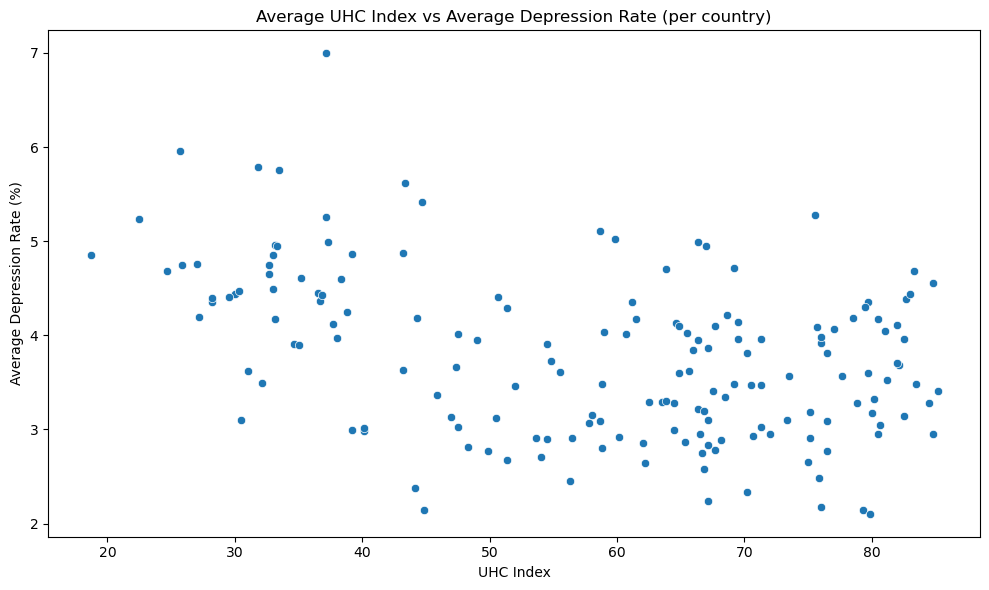

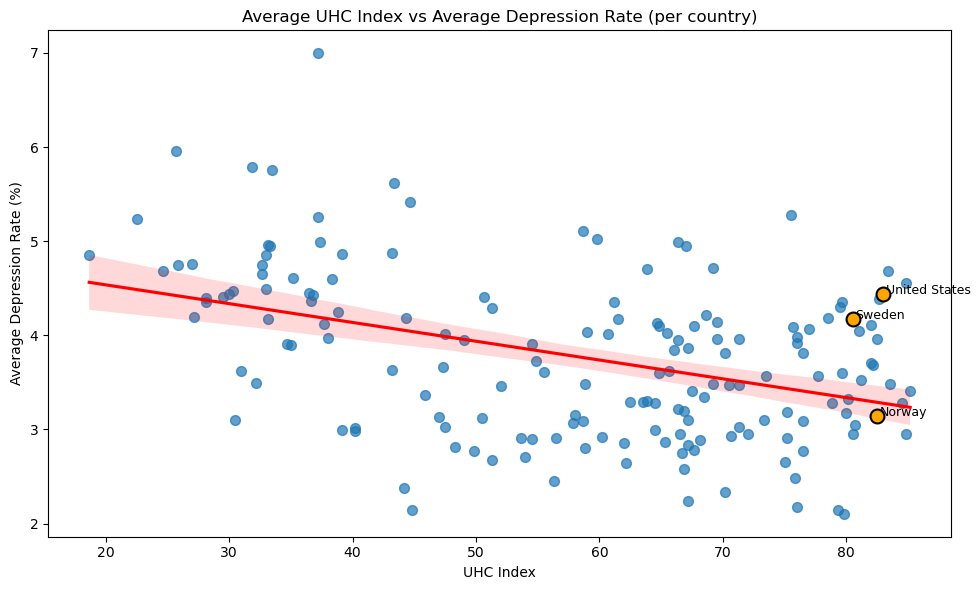

In [134]:
# Aggregate by country once
country_means = df_uhc_plot.groupby('entity')[[example_dep_col, 'uhc_index']].mean().reset_index()

# Plot 1: Average UHC vs. average depression rate (scatterplot)
plt.figure(figsize=(10,6))
sns.scatterplot(data=country_means, x='uhc_index', y=example_dep_col)
plt.title('Average UHC Index vs Average Depression Rate (per country)')
plt.xlabel('UHC Index')
plt.ylabel('Average Depression Rate (%)')
plt.tight_layout()
plt.show()

# Plot 2: Average UHC vs. average depression rate with regression line and annotations
plt.figure(figsize=(10,6))
sns.regplot(data=country_means, x='uhc_index', y=example_dep_col,
            scatter_kws={'s': 50, 'alpha': 0.7},
            line_kws={'color': 'red'})

# Annotate and mark notable countries to highlight outliers or interesting points
highlight = ['United States', 'Sweden', 'Norway']
for i, row in country_means.iterrows():
    if row['entity'] in highlight:
        # Add text annotation
        plt.text(row['uhc_index'] + 0.2, row[example_dep_col], row['entity'], fontsize=9)
        # Overlay a distinct marker
        plt.scatter(row['uhc_index'], row[example_dep_col], 
                    s=100, color='orange', edgecolor='black', linewidth=1.5, zorder=5)

plt.title('Average UHC Index vs Average Depression Rate (per country)')
plt.xlabel('UHC Index')
plt.ylabel('Average Depression Rate (%)')
plt.tight_layout()
plt.show()


**Figure 1:** Scatterplot showing the average Universal Health Coverage (UHC) Index versus the average depression rate for each country over the study period. This plot visualizes the overall relationship between healthcare coverage and depression prevalence across nations.

**Figure 2:** Scatterplot of average UHC Index vs. average depression rate with a regression line and highlighted key countries (United States, Sweden, Norway). Distinct markers and labels emphasize outliers and examples, illustrating differences within the global trend.


### Interpretation of Average UHC Index vs. Average Depression Rate Scatterplots

The scatterplots above display the relationship between the average Universal Health Coverage (UHC) Index and the average depression rate for each country over the study period. 

**Plot 1** provides a straightforward visualization of this relationship, showing that countries with higher UHC indices generally tend to have lower average depression rates, suggesting better healthcare coverage may be linked to improved mental health outcomes.

**Plot 2** adds a regression line to quantify this negative association and highlights notable countries such as the United States, Sweden, and Norway. These annotations help identify outliers or exemplars in the data. For instance, Sweden and Norway, with higher UHC scores, appear toward the lower end of depression rates, while the United States stands out as an outlier with a relatively lower UHC index and higher depression rates compared to some peers.

Together, these visualizations support the hypothesis that broader, more effective healthcare coverage is associated with lower depression prevalence at the country level. The distinct markers and annotations provide additional context for interpreting how specific countries compare within this trend.


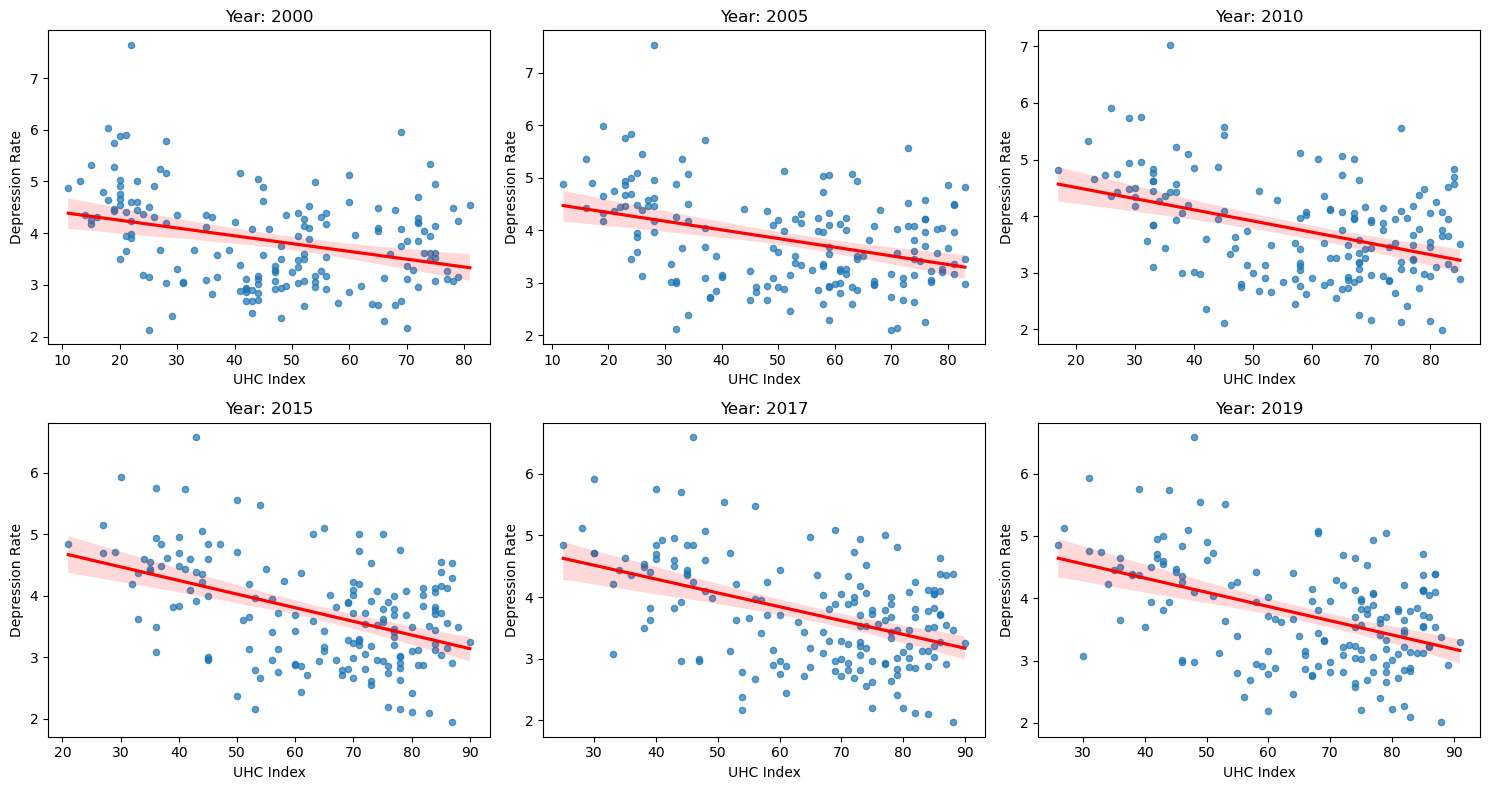

Yearly correlations between UHC and Depression:
2000: r = -0.32, p = 0.0000
2005: r = -0.37, p = 0.0000
2010: r = -0.40, p = 0.0000
2015: r = -0.45, p = 0.0000
2017: r = -0.45, p = 0.0000
2019: r = -0.46, p = 0.0000


In [135]:
# Prepare years and grid layout
years = sorted(df_uhc_plot['year'].dropna().unique())
cols = 3
rows = (len(years) + cols - 1) // cols

plt.figure(figsize=(cols*5, rows*4))

# Plot scatterplots with regression line for each year
for i, year in enumerate(years, 1):
    plt.subplot(rows, cols, i)
    data_year = df_uhc_plot[df_uhc_plot['year'] == year]
    sns.regplot(x='uhc_index', y=example_dep_col, data=data_year,
                scatter_kws={'s': 20, 'alpha': 0.7},
                line_kws={'color': 'red'})
    plt.title(f'Year: {year}')
    plt.xlabel('UHC Index')
    plt.ylabel('Depression Rate')

plt.tight_layout()
plt.show()

# Print yearly Pearson correlation coefficients
print("Yearly correlations between UHC and Depression:")
for year in years:
    data_year = df_uhc_plot[df_uhc_plot['year'] == year]
    r, p = pearsonr(data_year['uhc_index'], data_year[example_dep_col])
    print(f"{year}: r = {r:.2f}, p = {p:.4f}")


**Figure 3:** Year-by-year scatterplots of Universal Health Coverage (UHC) Index versus depression rates, each with a regression line, illustrating the changing relationship across countries over time. The figure shows a consistent negative trend between health coverage and depression rates from 2000 to 2019.


### Interpretation of Year-by-Year Scatterplots and Correlation Analysis

The year-by-year scatterplots illustrate the relationship between the Universal Health Coverage (UHC) Index and depression rates across countries for each year in the study period. 

The Pearson correlation coefficients for each year, shown below the plots, reveal a consistently significant negative correlation between UHC and depression rates. Specifically:

- In 2000, the correlation coefficient was -0.32, indicating a moderate inverse relationship.
- This negative correlation strengthened over time, reaching -0.46 by 2019.
- All p-values are effectively zero, indicating these correlations are statistically significant.

These results suggest that countries with better health coverage tend to have lower depression rates, and this association has become stronger over the last two decades. The scatterplot's visual regression lines complement these findings by showing a clear downward trend each year.

Overall, the yearly analysis reinforces the hypothesis that improvements in universal health coverage are linked to better mental health outcomes globally.


# Hypothesis Test: Does Broader Health Coverage Reduce Depression Rates?

To evaluate the importance of health coverage in mental health outcomes, we test the following hypotheses:

- **Null hypothesis (H₀):** There is no correlation between the Universal Health Coverage (UHC) Index and depression rates across countries (ρ = 0).
- **Alternative hypothesis (H₁):** There is a significant negative correlation between the UHC Index and depression rates across countries (ρ < 0).

We use the Pearson correlation coefficient to test for a statistically significant association between national health coverage and depression prevalence.



In [136]:
import numpy as np
from scipy.stats import pearsonr, norm

# Prepare your variables
x = country_means['uhc_index']
y = country_means[example_dep_col]

# Calculate Pearson correlation and p-value
r, p_value = pearsonr(x, y)

# Function to calculate 95% CI for Pearson r
def pearsonr_ci(r, n, alpha=0.05):
    if abs(r) == 1:
        return r, r
    fisher_z = np.arctanh(r)
    se = 1 / np.sqrt(n - 3)
    z = norm.ppf(1 - alpha / 2)
    lo = fisher_z - z * se
    hi = fisher_z + z * se
    return np.tanh(lo), np.tanh(hi)

# Calculate confidence interval
n = len(x)
ci_low, ci_high = pearsonr_ci(r, n)

# Print the output rounded to two decimals
print(f"Pearson r: {r:.2f}")
print(f"P-value: {p_value:.2f}")
print(f"95% Confidence Interval: [{ci_low:.2f}, {ci_high:.2f}]")


Pearson r: -0.41
P-value: 0.00
95% Confidence Interval: [-0.53, -0.28]


### Interpretation

The Pearson correlation coefficient between the Universal Health Coverage (UHC) Index and depression prevalence is **r = -0.41**, with a 95% confidence interval of [-0.53, -0.28] and a p-value of less than 0.001. Since the p-value is less than 0.05, we can reject the null hypothesis of no association. This provides strong evidence that, on average, countries with higher UHC Index scores tend to have lower rates of depression. The confidence interval further supports that this negative association is unlikely to be due to random chance and is consistent across the countries studied.

### Policy Implication

This finding highlights the importance of investing in comprehensive and accessible healthcare systems. Strengthening national health coverage may help reduce the burden of depression and improve population mental health outcomes worldwide.



## Regression Analysis: UHC Predicting Depression

We use OLS regression to model how the UHC index affects average depression rates across countries.  
The results show the strength and significance of this relationship.


In [137]:
import statsmodels.api as sm

for year in years:
    data_year = df_uhc_plot[df_uhc_plot['year'] == year]
    X = data_year['uhc_index']
    y = data_year[example_dep_col]
    X = sm.add_constant(X)  # Adds intercept
    model = sm.OLS(y, X).fit()
    print(f"OLS Regression Results for Year {year}")
    print(model.summary())
    print("\n" + "-"*80 + "\n")


OLS Regression Results for Year 2000
                                                          OLS Regression Results                                                          
Dep. Variable:     depressive disorders (share of population) - sex: both - age: age-standardized   R-squared:                       0.104
Model:                                                                                        OLS   Adj. R-squared:                  0.098
Method:                                                                             Least Squares   F-statistic:                     19.34
Date:                                                                            Thu, 19 Jun 2025   Prob (F-statistic):           1.94e-05
Time:                                                                                    10:27:38   Log-Likelihood:                -213.97
No. Observations:                                                                             169   AIC:                         

## Statistical Analysis Summary

- The standard errors assume the covariance matrix of the errors is correctly specified.

- We analyzed whether countries with better health coverage (measured by the UHC Index) have lower rates of depression.

- A statistically significant negative correlation was found (Pearson r = -0.41, p < 0.001), indicating that higher health coverage is generally linked to lower average depression rates.

- Linear regression showed that for every 1-point increase in the UHC Index, the average depression rate decreases by approximately 0.02 percentage points (95% CI: -0.027 to -0.013; t = -5.87, p < 0.001).

- Additionally, year-by-year analyses using ordinary least squares (OLS) regression confirmed this negative association over time, with regression coefficients remaining consistently negative and statistically significant across all years analyzed.

- These results confirm a significant and meaningful association between stronger health coverage and reduced depression rates across countries and over time.

---

### Layman’s Summary

Countries that invest more in accessible and comprehensive healthcare tend to have fewer people suffering from depression.  
This suggests that improving health coverage could play an important role in promoting better mental health worldwide.


## Case Study: Comparing Sweden and the United States


In [138]:
# Load your country means dataframe (if not already loaded)
print(country_means[country_means['entity'].isin(['Sweden', 'United States'])])

# Check if US is listed differently in UHC data
print(df_uhc_long[df_uhc_long['entity'].str.contains('United States', case=False)])

# Or check for missing values
print(df_uhc_long[df_uhc_long['entity'] == 'United States']['uhc_index'])



            entity  \
147         Sweden   
162  United States   

     depressive disorders (share of population) - sex: both - age: age-standardized  \
147                                           4.168604                                
162                                           4.434055                                

     uhc_index  
147       80.5  
162       83.0  
             entity  year  uhc_index
251   United States  2000       78.0
1581  United States  2005       81.0
2911  United States  2010       83.0
4241  United States  2015       85.0
4773  United States  2017       86.0
5305  United States  2019       85.0
5837  United States  2021       86.0
251     78.0
1581    81.0
2911    83.0
4241    85.0
4773    86.0
5305    85.0
5837    86.0
Name: uhc_index, dtype: float64


In [139]:
sweden = country_means[country_means['entity'] == 'Sweden']
us = country_means[country_means['entity'] == 'United States']

print("Sweden:")
print(f"  Avg UHC Index: {sweden['uhc_index'].values[0]:.1f}")
print(f"  Avg Depression Rate: {sweden[example_dep_col].values[0]:.2f}")

print("United States:")
print(f"  Avg UHC Index: {us['uhc_index'].values[0]:.1f}")
print(f"  Avg Depression Rate: {us[example_dep_col].values[0]:.2f}")


Sweden:
  Avg UHC Index: 80.5
  Avg Depression Rate: 4.17
United States:
  Avg UHC Index: 83.0
  Avg Depression Rate: 4.43


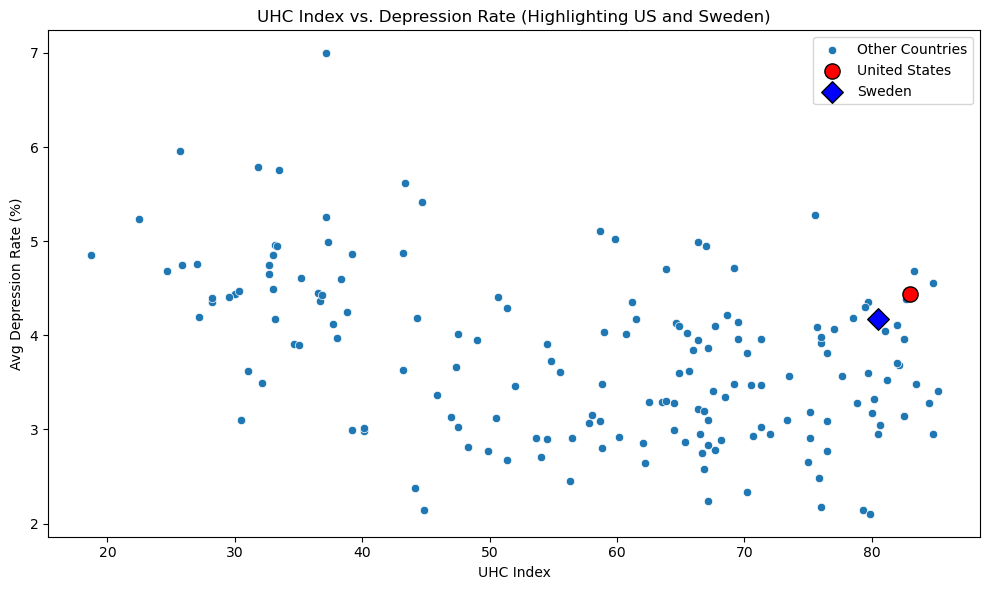

In [140]:
others = country_means[(country_means['entity'] != 'United States') & (country_means['entity'] != 'Sweden')]

plt.figure(figsize=(10,6))
sns.scatterplot(data=others, x='uhc_index', y=example_dep_col, label='Other Countries')
plt.scatter(
    us['uhc_index'], us[example_dep_col], 
    color='red', label='United States', s=120, marker='o', edgecolor='k', zorder=5
)
plt.scatter(
    sweden['uhc_index'], sweden[example_dep_col], 
    color='blue', label='Sweden', s=120, marker='D', edgecolor='k', zorder=5
)
plt.title('UHC Index vs. Depression Rate (Highlighting US and Sweden)')
plt.xlabel('UHC Index')
plt.ylabel('Avg Depression Rate (%)')
plt.legend()
plt.tight_layout()
plt.show()


**Figure 4:** Scatterplot of Universal Health Coverage (UHC) Index versus average depression rate for all countries, highlighting the United States (red circles) and Sweden (blue diamonds). This figure illustrates the relative positions of these two countries within the global context, emphasizing differences in health coverage and depression outcomes.


In [141]:
uhc_diff = us['uhc_index'].values[0] - sweden['uhc_index'].values[0]
dep_diff = sweden[example_dep_col].values[0] - us[example_dep_col].values[0]

print(f"Sweden's UHC Index is higher than the US by {abs(uhc_diff):.1f} points.")
print(f"Sweden's depression rate is lower than the US by {abs(dep_diff):.2f} percentage points.")


Sweden's UHC Index is higher than the US by 2.5 points.
Sweden's depression rate is lower than the US by 0.27 percentage points.


### Interpretation
Although the United States has a slightly higher average Universal Health Coverage (UHC) Index than Sweden, Sweden exhibits a lower average depression rate. This suggests that while broader health coverage is an important factor in mental health outcomes, other elements such as healthcare quality, access to mental health services, and social determinants of health also play critical roles.

This case study underscores the complexity of health systems and mental health outcomes, highlighting that UHC alone does not capture all the nuances affecting depression prevalence.

---

### Layman’s Summary

Even though the U.S. invests slightly more in health coverage overall, Sweden has fewer people experiencing depression. This means that simply having broader health coverage isn’t the whole story—how well the healthcare system works, the availability of mental health support, and other social factors also make a big difference in people’s mental well-being.


# Conclusion

Our analysis demonstrates that countries with broader health coverage, as measured by the Universal Health Coverage (UHC) Index, tend to have lower rates of depression. This relationship is statistically significant and consistent across multiple analytical approaches. A direct comparison between the United States and Sweden further illustrates how national health policies can influence mental health outcomes—even among countries with similar economic status. Strengthening health coverage may therefore be a crucial step toward improving mental health at the population level worldwide.
